We need to addess a situation to analyze the passengers survival from titanic based on prediction model. For this purpose the titanic survival dataset is used which is an open access data downloaded from Kaggle. The data keeps the records of passengers age, gender, cabin, ticket class, fare and their survival information. Here we have to make the predictions for survival based on these records. To proceed ahead we first call the data and check for the basic description including missing observations for observations if any.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\Is computer\\Desktop\\Codsoft\\Titanic_survival_prediction\\tested.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
print("Titanic data dimensions", df.shape)
print(df.head())

Titanic data dimensions (418, 12)
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [5]:
#Removing the unnecessary columns from data
df['gender'], _ = pd.factorize(df['Sex'])
df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,gender
0,0,3,male,34.5,0,0,7.8292,0
1,1,3,female,47.0,1,0,7.0000,1
2,0,2,male,62.0,0,0,9.6875,0
3,0,3,male,27.0,0,0,8.6625,0
4,1,3,female,22.0,1,1,12.2875,1


We found some irrelevant variables that have no direct impact on passenger's survival so we remove them from our data. The variable sex is converted into corresponding dummy records. 
We further observe that the variable age and Fare have majority of missing observations in data. So to run a smooth analysis we will replace them with mean of entire data observations. We next proceed with data visualization by considering 'survived' as our main variable of concern.

In [6]:
#Replacing the missing values by mean of data
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

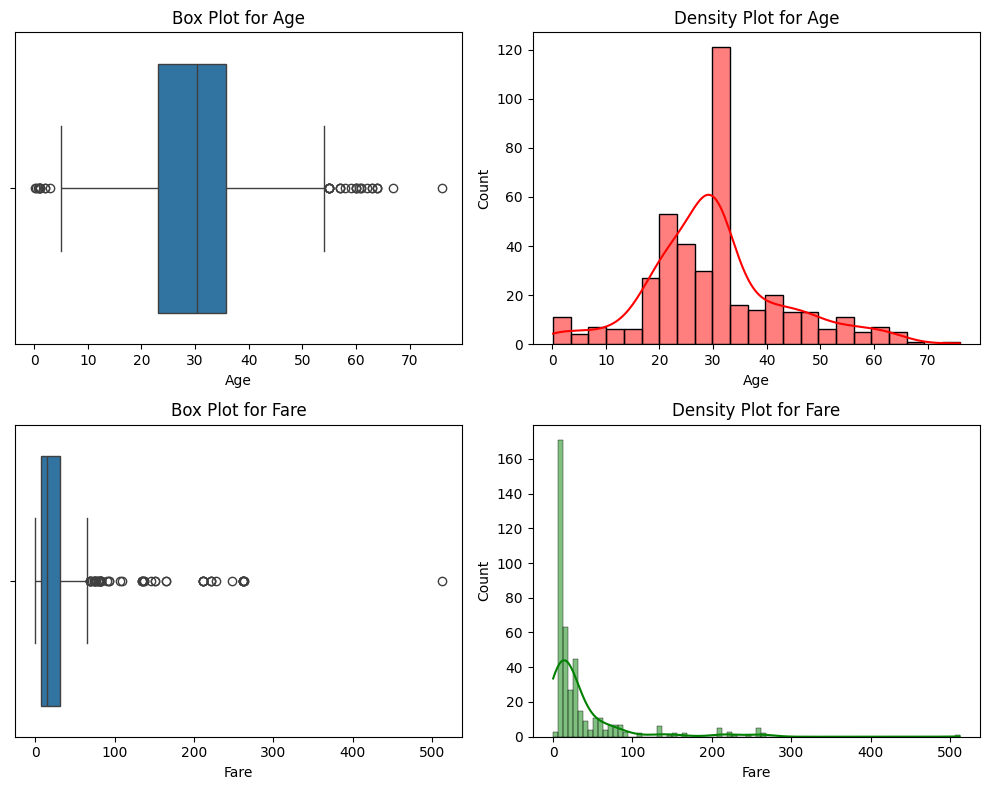

In [7]:
#Data Visualizations
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Box plot for Age
sns.boxplot(x='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for Age')

# Density plot for Age
sns.histplot(df['Age'], ax=axes[0, 1], color='red', fill=True, kde=True)
axes[0, 1].set_title('Density Plot for Age')

# Box plot for Fare
sns.boxplot(x='Fare', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot for Fare')

# Density plot for Fare
sns.histplot(df['Fare'], ax=axes[1, 1], color='green', fill=True, kde=True)
axes[1, 1].set_title('Density Plot for Fare')

plt.tight_layout()
plt.show()

#import warnings
#warnings.filterwarnings("ignore")

The distribution of age exhibit a normal pattern while fare follows a posotively skewed distribution. However, both variables have few outliers in their records.

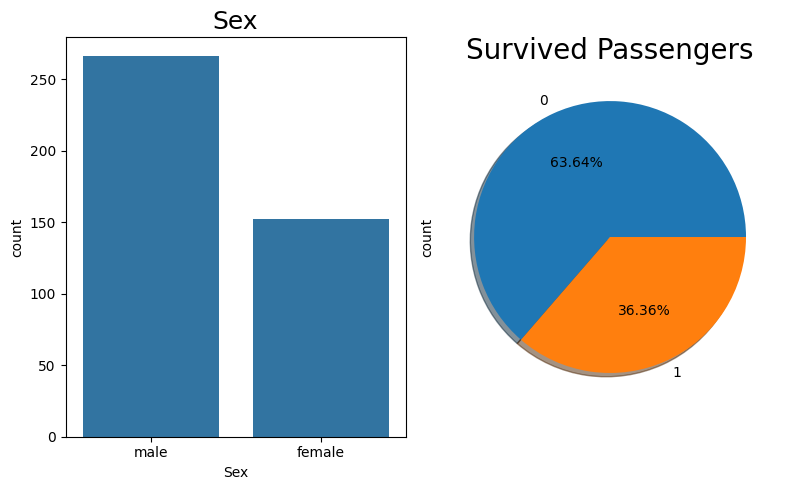

In [8]:
plt.figure(figsize=(8,5))

#Bar chart
plt.subplot(1,2,1)
sns.countplot(x=df['Sex'])
plt.title("Sex", fontsize=18)

#Pie chart
plt.subplot(1,2,2)
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
plt.title(label = "Survived Passengers", fontsize = 20,color='Black')

plt.tight_layout()
plt.show()

Among all the passergers, the majority of them belongs to male group. The large number of passenger were not survived with the prevelance rate of 63.64%. However, the survived passengers have the percentage of 36.36%. 

In [9]:
#Proceeding to heat map, First droping group variable 'sex'
df.drop(['Sex'], axis = 1, inplace = True)

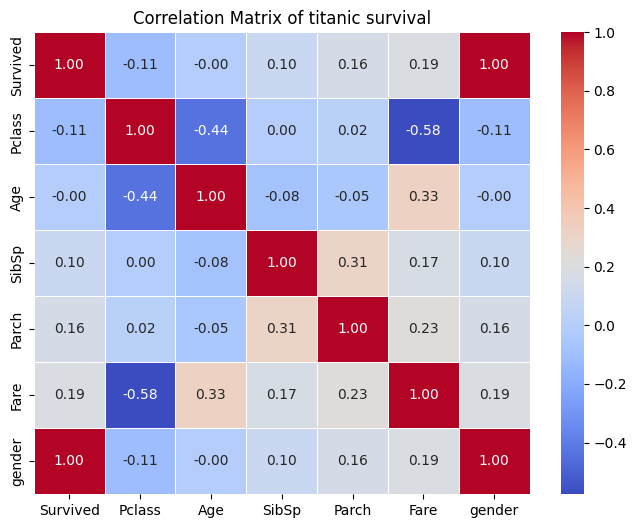

In [10]:
#Passernger heat map for accessing correlations among variables
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of titanic survival')
plt.show()

From the correlation heat map we observe the highest negative correlation between Passenger's class and fare (-0.58). While the highest positive correlation is find between passenger's age and fare (0.33).

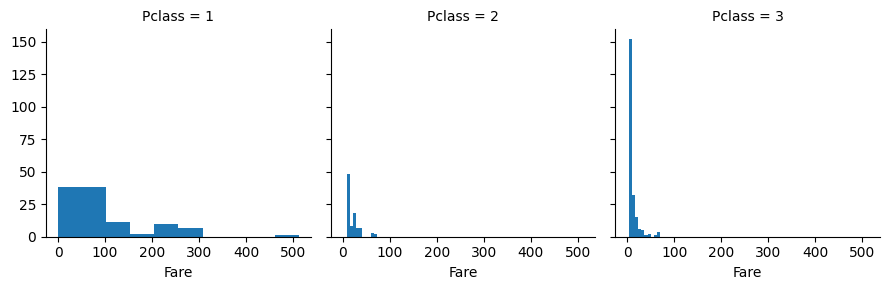

In [11]:
#Histogram of Passengers classes with respect to Fare
a = sns.FacetGrid(df, col="Pclass")
a.map(plt.hist, "Fare")

The three passenger classes histograms present the positively skewed pattern for class 2 and 3 and uniform pattern for class 1.
In order to predict the titanic passenger survival, we need to fit a logistics regression model. We consider the survival rate as response variable while other variables are as independent variables. We first split the data into training and test set. The logistic model is fitted on training set while test set is sued to validate the model.


In [12]:
#!pip install -U scikit-learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#df.head()


In [13]:
#Data splitting
y = df['Survived']
x = df.drop('Survived', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3)

In [14]:
#Fitting logistics regression model for Passenger Survival Prediction
lr = LogisticRegression(max_iter=1000)
model = lr.fit(x_train, y_train)
print(model)

LogisticRegression(max_iter=1000)


In [15]:
#Prediction
predictions = model.predict(x_test)

In [16]:
#Model summary and Score
from sklearn.metrics import classification_report
score = model.score(x_test, y_test)
print(score)
print(classification_report(y_test, predictions))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



After successful prediction of fitted model, we get the classification report of data including accuracy statistics. The fitted model have a f1-score equals to 1 which means the model have achieved full precision. So the fitted model is highly accurate and reliable.